*Reva Bharara*

*Email : revabharara@gmail.com*

*Linkedin : https://www.linkedin.com/in/reva-bharara-a83a78241/*

## Objective: To analyse Big mart sales dataset and forecasting sales.


### *Index:*

1. Importing the dependencies
2. Importing relevant datasets
3. Data exploration
4. Data preprocessing
5. Data Analysis
6. Model selection and prediction:
    * Simple Linear Regression
    * Multiple Linear Regression
    * Polynomial regression
    * Random Forest regressor regressor
    * XGB regressor
7. Model comparison
8. Conclusion
9. Credits

### -----------------------------------------------------------------------------------------------------------------------------
###  *1. Importing the dependencies*

In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

### -----------------------------------------------------------------------------------------------------------------------------
###  *2. Importing relevant datasets*

In [92]:
# creating a dataframe for training data as df_sales
df_sales=pd.read_csv('Train.csv')

# importing the test dataframe as df_sales_test
df_sales_test=pd.read_csv('Test.csv')

### -----------------------------------------------------------------------------------------------------------------------------
###  *3. Data exploration*

In this section we will explore the datasets and figure out its features and characteristics.

In [4]:
# viewing the dataframe
df_sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
# finding the shape and information of the training dataset
print(f'The shape of the training dataset is: {df_sales.shape}')


The shape of the training dataset is: (8523, 12)


In [6]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [7]:
# finding the shape and information about the testing dataset
df_sales_test.shape

(5681, 11)

In [8]:
df_sales_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


### We can gather the following insights from the above cells:
1. there are null values in both te testing and training datasets.
2. there are several categorical values that we will need to encode for prediction and model fitting

### The categorical values that we will need to encode are:
1. Item_Fat_Content 
2. Item_Type  
3. Outlet_Identifier 
4. Outlet_Size  
5. Outlet_Location_Type
6. Outlet_Type 

### -----------------------------------------------------------------------------------------------------------------------------
###  *4. Data Preprocessing*
#### In this section we will:
1. Clean the data
2. Extract the features
3. Standardize and Normalize the data if needed

#### Cleaning the data
1. we will be replacing the missing numerical values with the mean of the column.
2. we will be replacing the categorical missing data with the mode of that particular category.

In [9]:
#  1   Item_Weight                7060 non-null   float64
# replacing the Nan/missing values in the float type columns with the mean of the column
df_sales['Item_Weight'].replace(np.nan, df_sales['Item_Weight'].mean(), inplace=True)


In [10]:
#  8   Outlet_Size                6113 non-null   object 
# replacing the Nan/missing values in the categorical columns with the mode
df_sales['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [11]:
# creating a pivot table
mode_of_outlet_size=pd.pivot_table(data=df_sales, values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))
mode_of_outlet_size

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [12]:
# replacing the values
missing_outlet_size=df_sales['Outlet_Size'].isnull()
missing_outlet_size


0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool

In [13]:
# replacing the missing values using mode imputation strategy
df_sales.loc[missing_outlet_size,'Outlet_Size']=df_sales.loc[missing_outlet_size,'Outlet_Type'].apply(lambda x: mode_of_outlet_size[x])

In [14]:
# checling if there are any missing values left
df_sales.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [15]:
# clearing all the null values in the testing data
df_sales_test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [16]:
# dropping all the rows from the test dataset that are missing
df_sales_test.dropna(inplace=True)

In [17]:
df_sales_test.shape

(3099, 11)

#### data standardization

In [18]:
# for all the categorical data we will be seeing the unique values in each column

# creating a list of categorical columns
cat_col=[col for col in df_sales.columns if df_sales[col].dtype==np.dtype('O')]

# finding unique values in categorical columns
for col in df_sales[cat_col]:
    print('\n')
    print(f'The unique values in {col} column are:')
    print(df_sales[col].value_counts())



The unique values in Item_Identifier column are:
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64


The unique values in Item_Fat_Content column are:
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


The unique values in Item_Type column are:
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


The unique values in Outlet_Identifier co

#### As we can see from the above output that in the Item_Fat_Content column there are several values that denote the same thing, so we need to fix that

Low Fat    5089

Regular    2889

LF          316

reg         117

low fat     112

As we can see here than the three categories LF, Low Fat and low fat mean the same thing so doing this process we will be converting them into one column i.e. Low fat.

In [19]:
# replacing values
df_sales['Item_Fat_Content'].replace({'LF': 'Low Fat','low fat': 'Low Fat','reg': 'Regular'}, inplace=True)

In [20]:
# checking the value counts in the item weight column
df_sales['Item_Fat_Content'].value_counts(0)

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [21]:
# now standardizing the testing set similarly
# replacing values
df_sales_test['Item_Fat_Content'].replace({'LF': 'Low Fat','low fat': 'Low Fat','reg': 'Regular'}, inplace=True)

# checking the value counts in the item weight column
df_sales_test['Item_Fat_Content'].value_counts(0)

Low Fat    2008
Regular    1091
Name: Item_Fat_Content, dtype: int64

### -----------------------------------------------------------------------------------------------------------------------------
###  *5. Data analysis*

In [22]:
#sets the plotting styles for sns to make graphs more visually appealing.
sns.set()

In [23]:
# getting some numerical insights on the data
df_sales.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [24]:
# finding the correlations of the numerical values
corr_table=df_sales.corr()
corr_table.head()

C:\Users\revab\AppData\Local\Temp\ipykernel_8040\2142387921.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_table=df_sales.corr()


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.012049,0.024756,-0.008301,0.011550
Item_Visibility,-0.012049,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.024756,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.008301,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.011550,-0.128625,0.567574,-0.049135,1.000000


Text(0.5, 1.0, 'Heatmap showing the correlation between the different columsn of the dataframe')

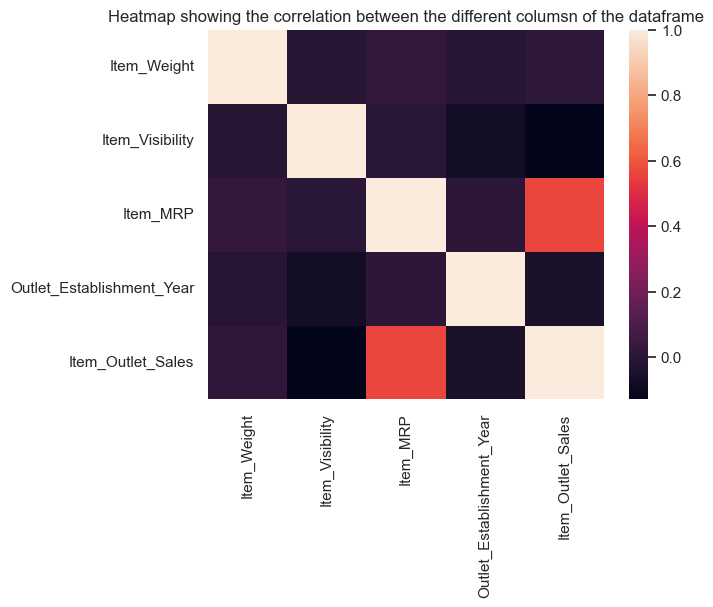

In [25]:
# plotting the correlation of different columns using a heatmap
sns.heatmap(corr_table)
plt.title('Heatmap showing the correlation between the different columsn of the dataframe')

#### From the above heatap we can see that there is no strong postive or negative correlation between any of the numerical columns since all the values are closer to 0 than they are to 1 or -1.

### Visualizing the data for better analysis
In this section I will:
1. See the distribution of items in various categories based on the respective columns
2. plotting some regression correlations.

#### Distribution of items 

Text(0.5, 1.0, 'Distribution of Item Weights')

<Figure size 600x600 with 0 Axes>

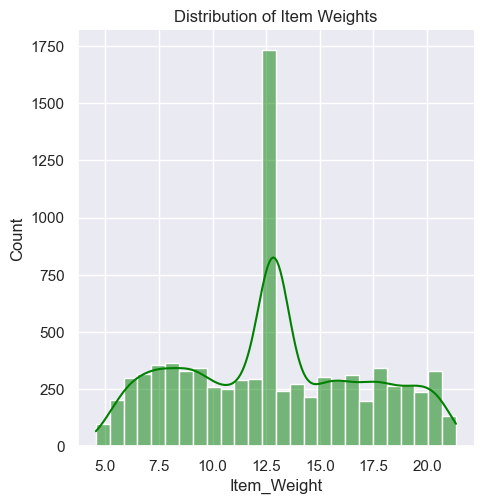

In [26]:
plt.figure(figsize=(6,6))
sns.displot(df_sales['Item_Weight'], kde=True, color='green')
plt.title('Distribution of Item Weights')

Here we can see that most of the items have a weight that lies in the category of 12.5

Text(0.5, 1.0, 'Item fat content distribution')

<Figure size 600x600 with 0 Axes>

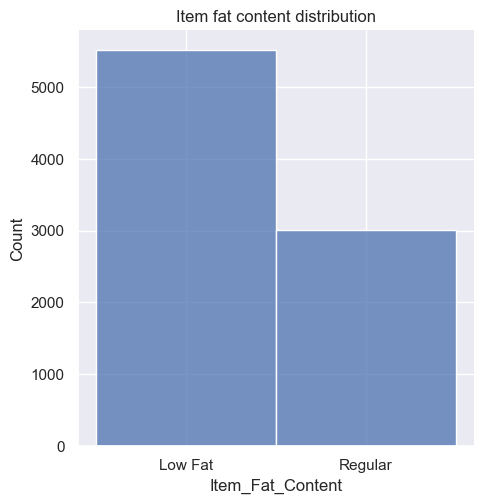

In [27]:
plt.figure(figsize=(6,6))
sns.displot(x=df_sales.Item_Fat_Content)
plt.title('Item fat content distribution')

Text(0.5, 1.0, 'Item Visibility distribution')

<Figure size 600x600 with 0 Axes>

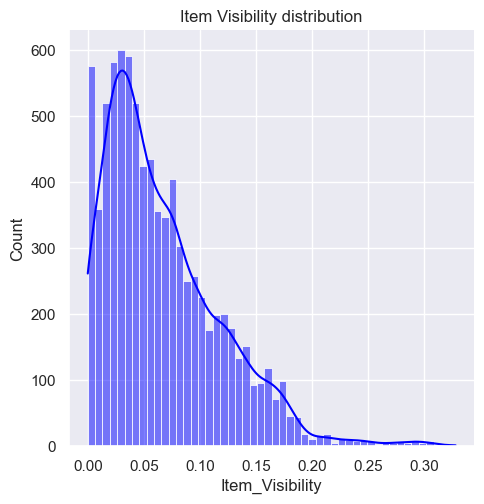

In [28]:
plt.figure(figsize=(6,6))
sns.displot(df_sales['Item_Visibility'], color='blue', kde=True)
plt.title('Item Visibility distribution')

Text(0.5, 1.0, 'Item Type distribution')

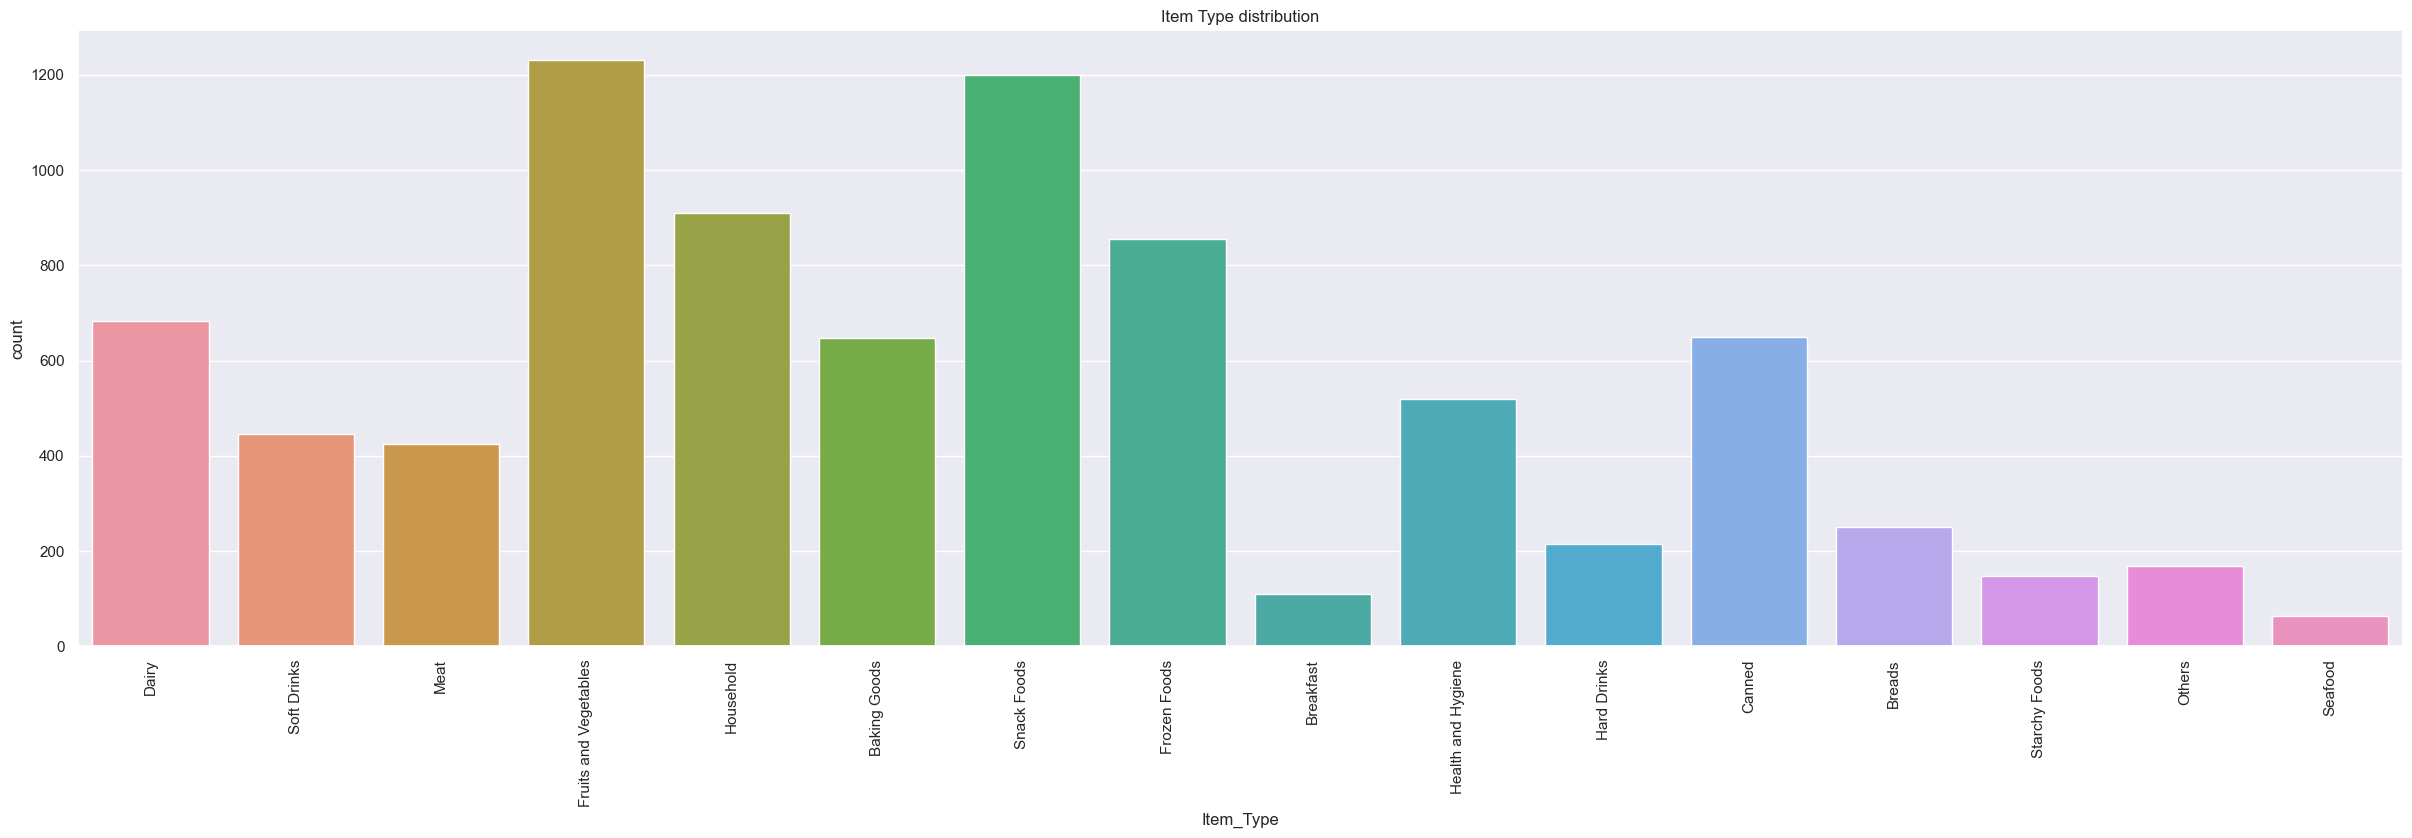

In [29]:
plt.figure(figsize=(30,8))
sns.countplot(x=df_sales['Item_Type'])
plt.xticks(rotation=90)
plt.title('Item Type distribution')

Text(0.5, 1.0, 'Item MRP distribution')

<Figure size 600x600 with 0 Axes>

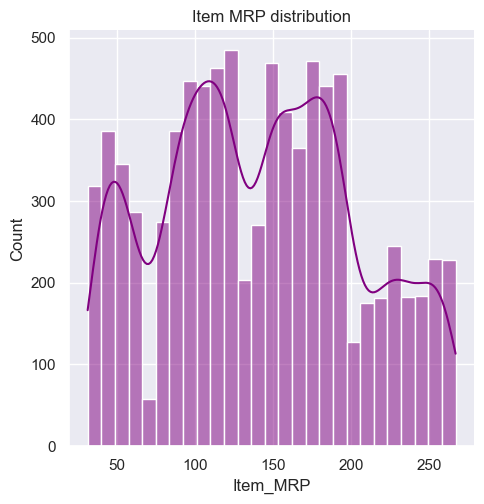

In [30]:
plt.figure(figsize=(6,6))
sns.displot(df_sales['Item_MRP'], color='purple', kde=True)
plt.title('Item MRP distribution')

Text(0.5, 1.0, 'Outlet Establishment Year')

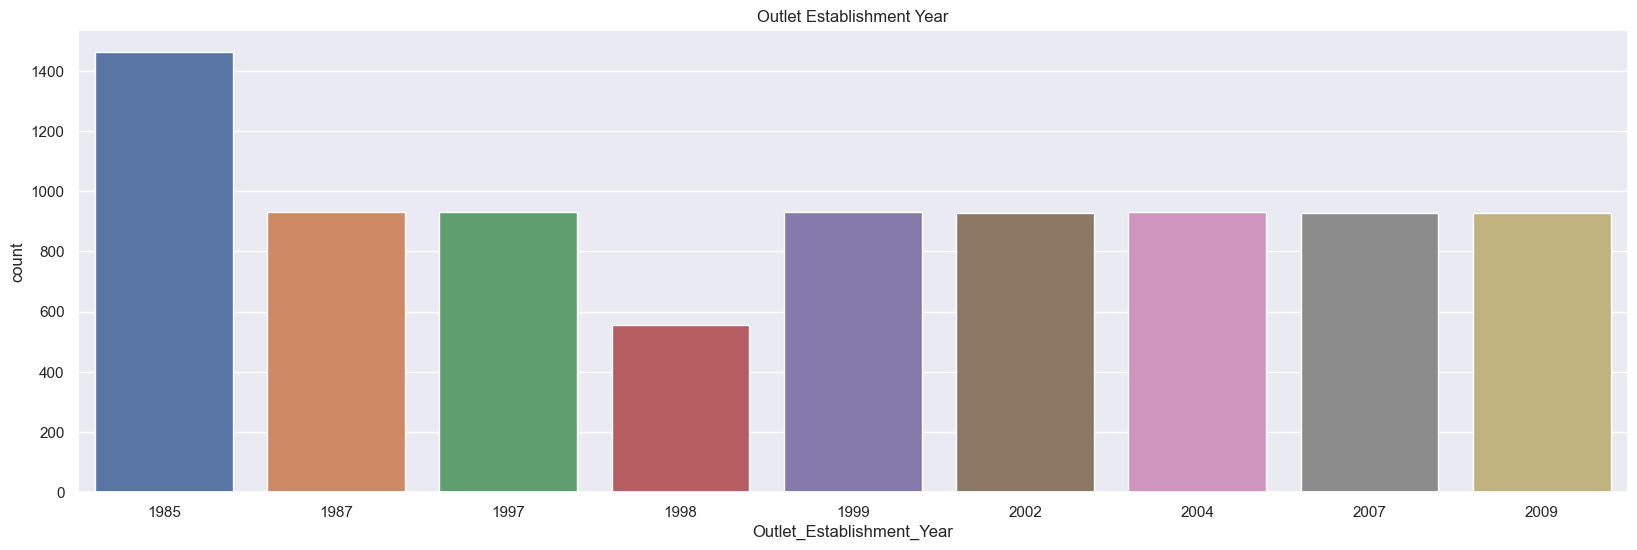

In [31]:
plt.figure(figsize=(20,6))
sns.countplot(x=df_sales['Outlet_Establishment_Year'])
plt.title('Outlet Establishment Year')

Text(0.5, 1.0, 'Outlet Size distribution')

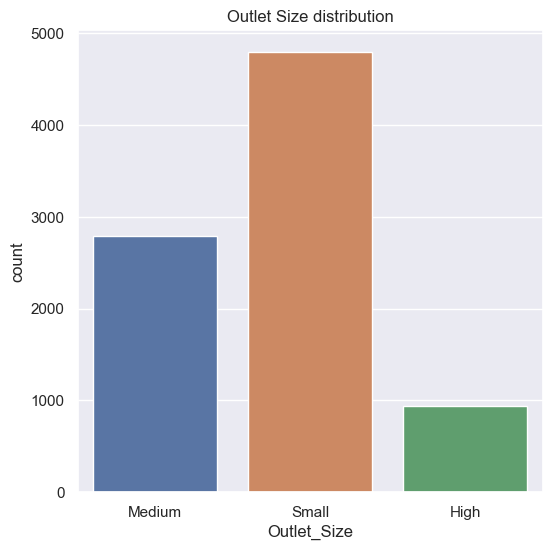

In [32]:
plt.figure(figsize=(6,6))
sns.countplot(x=df_sales['Outlet_Size'])
plt.title('Outlet Size distribution')

Text(0.5, 1.0, 'Outlet Location Type')

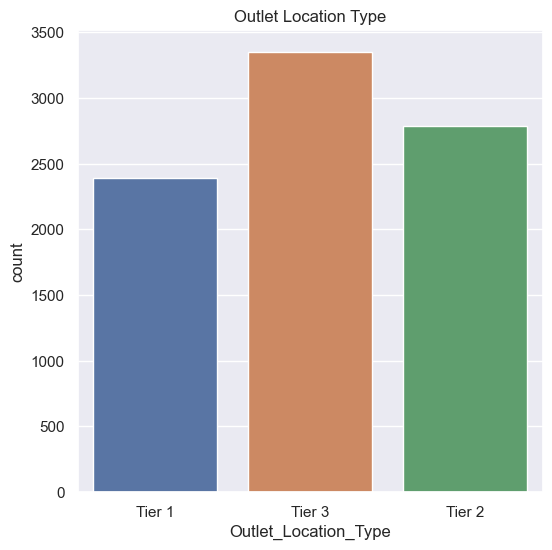

In [33]:
plt.figure(figsize=(6,6))
sns.countplot(x=df_sales['Outlet_Location_Type'])
plt.title('Outlet Location Type')

Text(0.5, 1.0, 'Outlet Type')

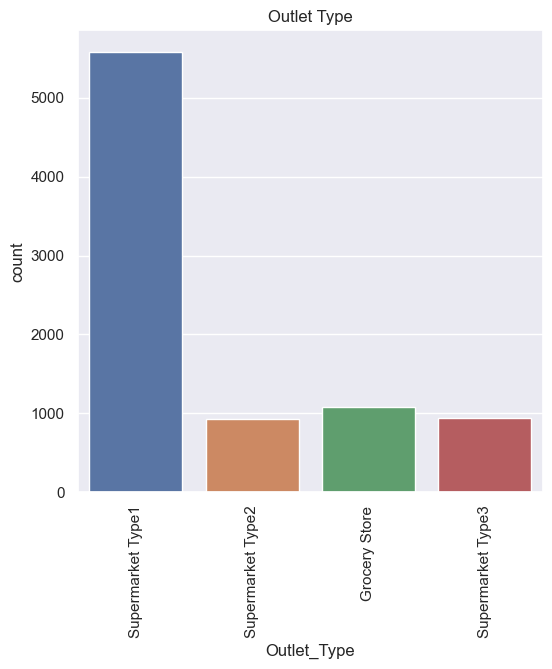

In [34]:
plt.figure(figsize=(6,6))
sns.countplot(x=df_sales['Outlet_Type'])
plt.xticks(rotation=90)
plt.title('Outlet Type')

#### Since we have already seen that there is no strong correlation between the continuous independent variables and the dependent variable (Item Outlet sales) in the correlation table, we now try and find if any significant association exists between the categorical independent (predictor) variables and the target variable.

Text(0.5, 1.0, 'relation between outlet type and target variable')

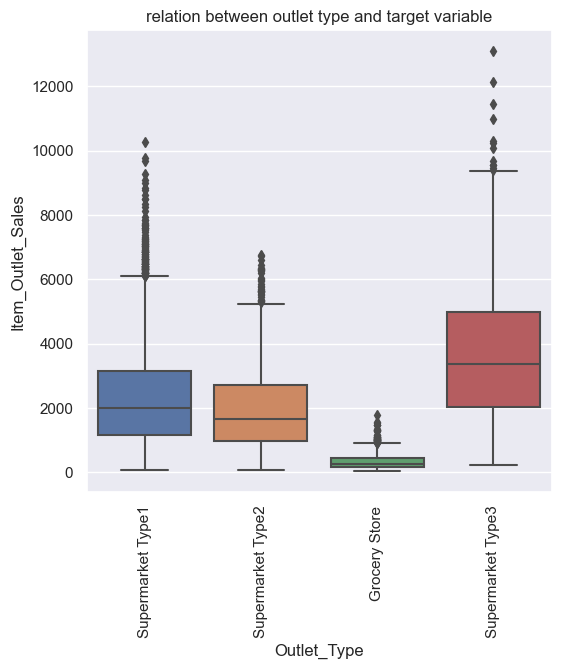

In [35]:
# checking the relationship between Outlet type and item outlet sales
plt.figure(figsize=(6,6))
sns.boxplot(x=df_sales['Outlet_Type'], y=df_sales['Item_Outlet_Sales'])
plt.xticks(rotation=90)
plt.title('relation between outlet type and target variable')

From the above plot we can see that in terms of outlet size, grocery store have the least item outlset sales whereas supermartket type 3 have the highest. Thus this can be an indicator that outlet type can be a varible that affect the item outlet sales.


Text(0.5, 1.0, 'relation between outlet location type and target variable')

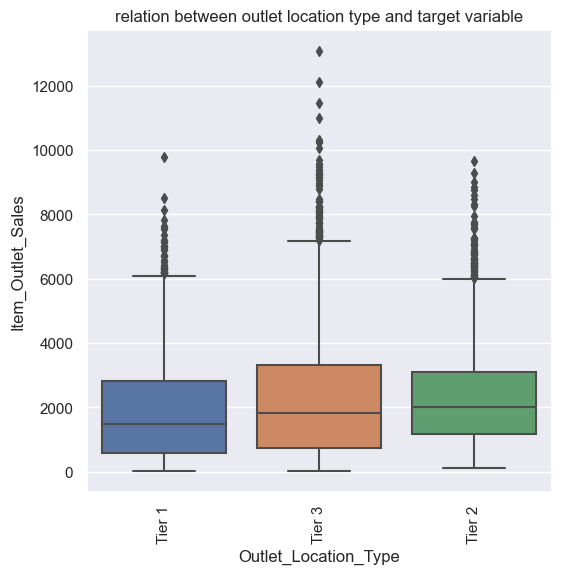

In [36]:
# checking the relationship between Outlet type and item outlet sales
plt.figure(figsize=(6,6))
sns.boxplot(x=df_sales['Outlet_Location_Type'], y=df_sales['Item_Outlet_Sales'])
plt.xticks(rotation=90)
plt.title('relation between outlet location type and target variable')

Text(0.5, 1.0, 'relation between outlet size and target variable')

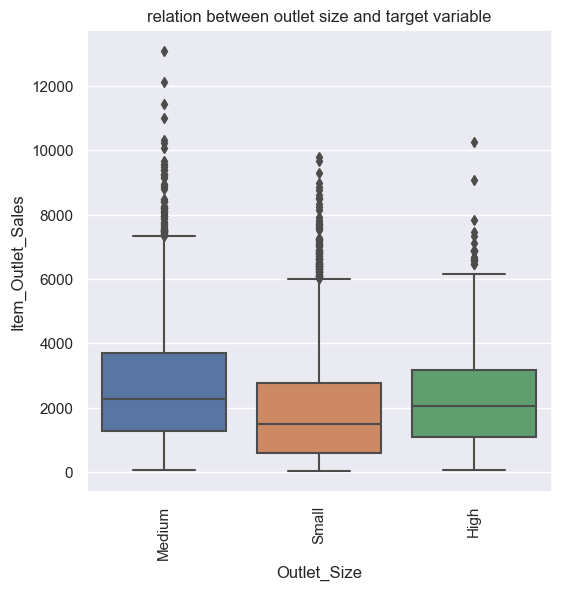

In [37]:
# checking the relationship between Outlet type and item outlet sales
plt.figure(figsize=(6,6))
sns.boxplot(x=df_sales['Outlet_Size'], y=df_sales['Item_Outlet_Sales'])
plt.xticks(rotation=90)
plt.title('relation between outlet size and target variable')

As we can see from the above plot there is a significant difference in the item outlet sales and based on the outlet location type as the variance is present.

Text(0.5, 1.0, 'Relation between item visibility and sales')

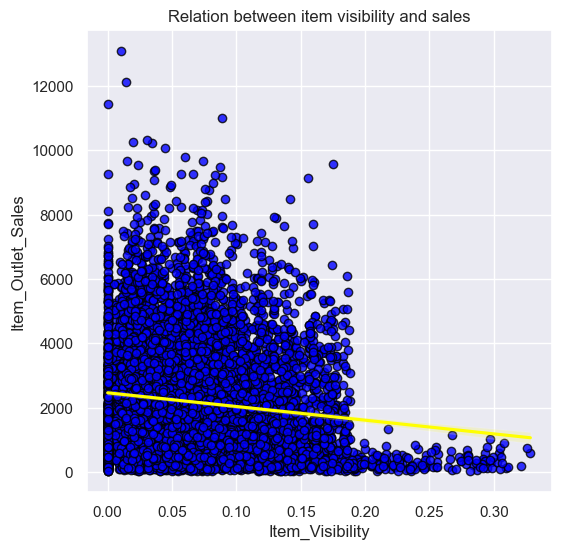

In [38]:
plt.figure(figsize=(6,6))
sns.regplot(x=df_sales['Item_Visibility'], y=df_sales['Item_Outlet_Sales'], line_kws={'color':'yellow'}, scatter_kws={'color':'blue','edgecolor':'black'})
plt.title('Relation between item visibility and sales')

We can see in the above graph that there is a correlation between item visibility and sales but it is not strong enough as the slope of the line is not that much.
We can also see that it has a negative correlation

Text(0.5, 1.0, 'Relation between item MRP and sales')

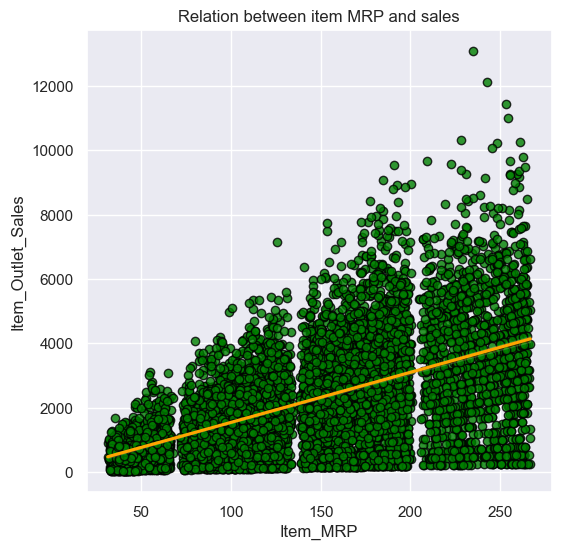

In [39]:
plt.figure(figsize=(6,6))
sns.regplot(x=df_sales['Item_MRP'], y=df_sales['Item_Outlet_Sales'], line_kws={'color':'orange'}, scatter_kws={'color':'green','edgecolor':'black'})
plt.title('Relation between item MRP and sales')

We can see in the above plot thtat thgere seems to be a significant correlation between item mrp and item outlet sales

### Label Encoding
for mapping the relationship between the categorical values and the target column and o fit the models we use subsequently we need to encode the labels using the label encoder.
The label encoder basically gives a unique number to each type of category such that they are represented in a numerical format now.

In [40]:
# initializing the encoder object
encoder=LabelEncoder()

# encoding all the categorical columns

df_sales['Item_Fat_Content']=encoder.fit_transform(df_sales['Item_Fat_Content'])
df_sales['Item_Type']=encoder.fit_transform(df_sales['Item_Type'])
df_sales['Outlet_Identifier']=encoder.fit_transform(df_sales['Outlet_Identifier'])
df_sales['Outlet_Size']=encoder.fit_transform(df_sales['Outlet_Size'])
df_sales['Outlet_Location_Type']=encoder.fit_transform(df_sales['Outlet_Location_Type'])
df_sales['Outlet_Type']=encoder.fit_transform(df_sales['Outlet_Type'])

In [41]:
# viewing the encoded results
df_sales.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300000,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,DRC01,5.920000,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,FDN15,17.500000,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,FDX07,19.200000,1,0.000000,6,182.0950,0,1998,2,2,0,732.3800
4,NCD19,8.930000,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052
5,FDP36,10.395000,1,0.000000,0,51.4008,3,2009,1,2,2,556.6088
6,FDO10,13.650000,1,0.012741,13,57.6588,1,1987,0,2,1,343.5528
7,FDP10,12.857645,0,0.127470,13,107.7622,5,1985,1,2,3,4022.7636
8,FDH17,16.200000,1,0.016687,5,96.9726,7,2002,2,1,1,1076.5986
9,FDU28,19.200000,1,0.094450,5,187.8214,2,2007,2,1,1,4710.5350


### -----------------------------------------------------------------------------------------------------------------------------
###  *5. Model Selection and Prediction*

In this section we will be trying different regression models and see which one gives us the best results in terms of minimizing the error in its prediction.

The models we will use are:
1. Simple Linear Regression
2. Multiple Linear Regression
3. XGB regressor
4. Polynomial regression
5. Decision tree regressor

#### Creating the train test split

In [42]:
X=df_sales.drop(columns=['Item_Identifier','Item_Outlet_Sales'], axis=1)
Y= df_sales['Item_Outlet_Sales']

X_train,X_test,Y_train,Y_test=train_test_split(X, Y, test_size=0.2, random_state=2)

print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(6818, 10) (6818,)
(1705, 10) (1705,)


### 1. Simple Linear regression
In the correlation table we found that the item mrp was somehow connected to the item outlet sales, so I will be seeing if we can predict the target variable soley with that feature

In [43]:
# initializing the model
lr=LinearRegression()
X_train_lr=X_train['Item_MRP'].values.reshape(-1,1)
X_test_lr=X_test['Item_MRP'].values.reshape(-1,1)

# fitting the model
lr.fit(X_train_lr, Y_train)

# testing the model for prediction
Y_hat=lr.predict(X_test_lr)
Y_hat

array([1138.89991801, 3819.01397247, 1335.43274478, ..., 2657.03651336,
       3972.39341037, 3532.02332179])

In [44]:
# evaluating the model
r2_lr=lr.score(X_test_lr,Y_test)
mae_lr=mean_absolute_error(Y_test,Y_hat)
mse_lr=mean_squared_error(Y_test,Y_hat)

print(f'The R2 value is": {r2_lr}')
print(f'The mean absolute error is: {mae_lr}')
print(f'The mean squared error is: {mse_lr}')


The R2 value is": 0.29501134495267944
The mean absolute error is: 1082.3860561273118
The mean squared error is: 2176352.648161309


#### We see that simple linear regression i.e. is not an optimal model for prediction as the mean absolue error as well as the mean squared error are pretty high.
Also, performing simple linear regression on other features is pointless since they have a lower correlation values than Item_MRP.

### 2. Multiple Linear regression
here we will be selecting multiple features and seeing how they all together can be used to predict the target

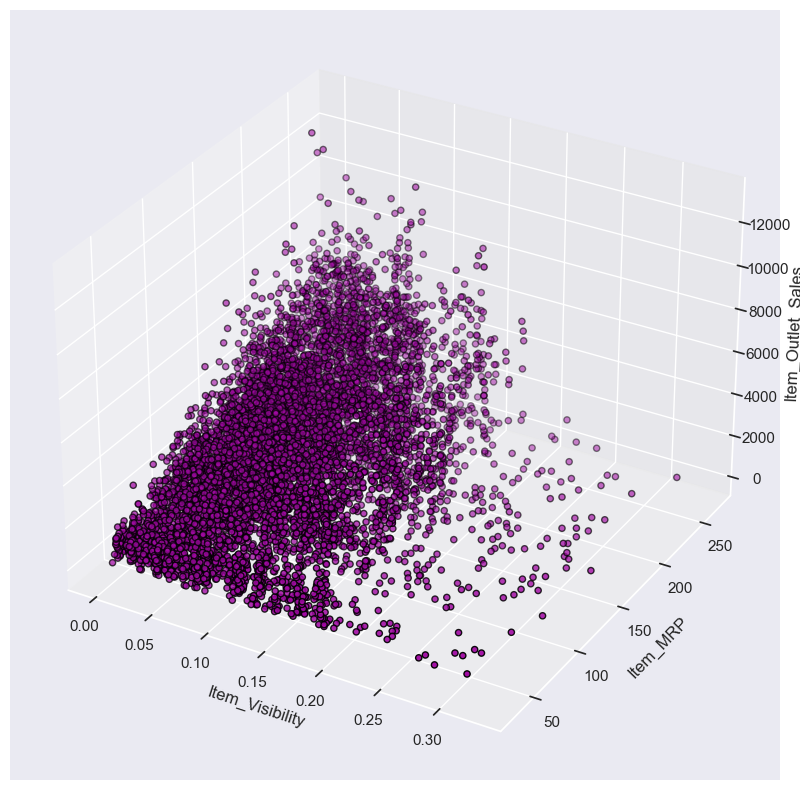

In [45]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_sales['Item_Visibility'], df_sales['Item_MRP'], df_sales['Item_Outlet_Sales'], color='#a10aa3', edgecolor='black')
ax.set_xlabel('Item_Visibility')
ax.set_ylabel('Item_MRP')
ax.set_zlabel('Item_Outlet_Sales')
plt.show()

#### From this plot we can see that the item outlet sales increases with the decrease in item visibility and increase in item mrp.
So these numerical factors can be crucial in multiple regression feature selection.


In [46]:
# initializing the model
mlr=LinearRegression()

# fitting the model
mlr.fit(X_train,Y_train)

# making predictions
Y_hat_mlr=mlr.predict(X_test)

In [47]:
# evaluating the model
r2_mlr=mlr.score(X_test,Y_test)
mae_mlr=mean_absolute_error(Y_test,Y_hat_mlr)
mse_mlr=mean_squared_error(Y_test,Y_hat_mlr)

print(f'The R2 value is": {r2_mlr}')
print(f'The mean absolute error is: {mae_mlr}')
print(f'The mean squared error is: {mse_mlr}')


The R2 value is": 0.48913213984900805
The mean absolute error is: 944.8766216025635
The mean squared error is: 1577087.2514614917


#### We can see that multiple Linear Regression model performed better than the simple linear regression model but it still didn't quite reach the mark since the errors are still high and the r2 value is still low.

### 3. Polynomial regression
In this section I will try to use polynomial features so as to see if we can get better results.

In [48]:
#initializing the model
pf=PolynomialFeatures(degree=3)
pf_X_train=pf.fit_transform(X_train)
pf_X_test=pf.fit_transform(X_test)

plr=LinearRegression()

# fitting the resgrssor
plr.fit(pf_X_train,Y_train)

# predicting the results
Y_hat_plr=plr.predict(pf_X_test)


In [49]:
# evaluating the model
r2_plr=plr.score(pf_X_test,Y_test)
mae_plr=mean_absolute_error(Y_test,Y_hat_plr)
mse_plr=mean_squared_error(Y_test,Y_hat_plr)

print(f'The R2 value is": {r2_plr}')
print(f'The mean absolute error is: {mae_plr}')
print(f'The mean squared error is: {mse_plr}')


The R2 value is": 0.58239430563329
The mean absolute error is: 792.0546956595952
The mean squared error is: 1289179.9780256418


#### As we can see polynomial regression gives us way better results and it works best with degree hyperparameter set to 3.
It gives us the highest scores as of now.

### 4. Random Forest Regressor


In [50]:
# initializing the regressor
rfr=RandomForestRegressor(max_depth=7, min_samples_split=5,n_estimators=100)

# # Create the random grid
# random_grid ={'max_depth': [5, 7],
#  'min_samples_split': [2, 5],
#  'n_estimators': [200, 50, 1000]}

# grid=GridSearchCV(rfr, random_grid)
# grid.fit(X_train,Y_train)
# grid_best_params_


In [51]:
# fitting the resgrssor
rfr.fit(X_train,Y_train)

# predicting the results
Y_hat_rfr=rfr.predict(X_test)
Y_hat_rfr

array([2274.58789407, 3825.80670035, 1418.22012859, ..., 2867.00483513,
       3445.96846942, 3897.58641084])

In [52]:
# evaluating the model
r2_rfr=mlr.score(X_test,Y_test)
mae_rfr=mean_absolute_error(Y_test,Y_hat_rfr)
mse_rfr=mean_squared_error(Y_test,Y_hat_rfr)

print(f'The R2 value is": {r2_rfr}')
print(f'The mean absolute error is: {mae_rfr}')
print(f'The mean squared error is: {mse_rfr}')


The R2 value is": 0.48913213984900805
The mean absolute error is: 791.2616495750796
The mean squared error is: 1292635.1783280403


### 5. XGboost regression
In this section we will be seing if XGboost gives us any better results.
XGboost is a gradient boosting aolgorithm that iteratively makes decision tress for maximum informatio gain to give best results.

In [53]:
# initializing the regressor
xgb=XGBRegressor()

# fitting the resgrssor
xgb.fit(X_train,Y_train)

# predicting the results
Y_hat_xgb=xgb.predict(X_test)
Y_hat_xgb

array([2319.8562, 3055.6287, 1759.3649, ..., 2641.3992, 1777.3583,
       3544.677 ], dtype=float32)

In [54]:
# evaluating the model
r2_xgb=mlr.score(X_test,Y_test)
mae_xgb=mean_absolute_error(Y_test,Y_hat_xgb)
mse_xgb=mean_squared_error(Y_test,Y_hat_xgb)

print(f'The R2 value is": {r2_xgb}')
print(f'The mean absolute error is: {mae_xgb}')
print(f'The mean squared error is: {mse_xgb}')


The R2 value is": 0.48913213984900805
The mean absolute error is: 841.6976840699269
The mean squared error is: 1455054.9096089718


#### since the xgb regressior didnt quite deliver good accurcy i will have to tune the hyperpaarmeters to better results.

In [55]:
# params={'learning_rate':[0.01,0.1,0.3], 'max_depth':[3,5,7,9], 'n_estimators':[100,500,1000]}
# grid=GridSearchCV(xgb, params)
# grid.fit(X_train,Y_train)
# grid.best_params_

In [56]:
# initializing the regressor
xgb=XGBRegressor(learning_rate=0.01, max_depth=3, n_estimators=500)

# fitting the resgrssor
xgb.fit(X_train,Y_train)

# predicting the results
Y_hat_xgb=xgb.predict(X_test)
Y_hat_xgb

array([2166.462 , 3899.9702, 1398.81  , ..., 2845.7095, 3413.353 ,
       3875.2478], dtype=float32)

In [57]:
# evaluating the model
r2_xgb=mlr.score(X_test,Y_test)
mae_xgb=mean_absolute_error(Y_test,Y_hat_xgb)
mse_xgb=mean_squared_error(Y_test,Y_hat_xgb)

print(f'The R2 value is": {r2_xgb}')
print(f'The mean absolute error is: {mae_xgb}')
print(f'The mean squared error is: {mse_xgb}')


The R2 value is": 0.48913213984900805
The mean absolute error is: 788.5673865307367
The mean squared error is: 1278648.3400356187


#### as we can see here the mse and mae habe been reduced significantly by tuning the hyperparameters

### -----------------------------------------------------------------------------------------------------------------------------
###  *5. Model Comparison*

In this section we will be comparing the differnt models implemented in the previous sections to find what works best. This involves:
1. comparing based on errors and accuarcy scores
2. plotting them to find the best model

#### creating a dataframe for errors (MAE AND MSE)

In [64]:
error_dict={'Linear regression':[r2_lr,mae_lr, mse_lr], 'Multiple Linear Regression': [r2_mlr,mae_mlr,mse_mlr],
                    'Polynomial Regression': [r2_plr,mae_plr, mse_plr], 'Random Forest Regressor': [r2_rfr,mae_rfr,mse_rfr],
                   'XGBoost regressor': [r2_xgb,mae_xgb,mse_xgb]}
df_error=pd.DataFrame(error_dict, index=['R2 score','MAE','MSE'])
df_error=df_error.applymap(lambda x: round(x,2))
df_error

,Linear regression,Multiple Linear Regression,Polynomial Regression,Random Forest Regressor,XGBoost regressor
R2 score,0.30,0.49,0.58,0.49,0.49
MAE,1082.39,944.88,792.05,791.26,788.57
MSE,2176352.65,1577087.25,1289179.98,1292635.18,1278648.34


#### plotting the variation in results

Text(0, 0.5, 'Mean squared error')

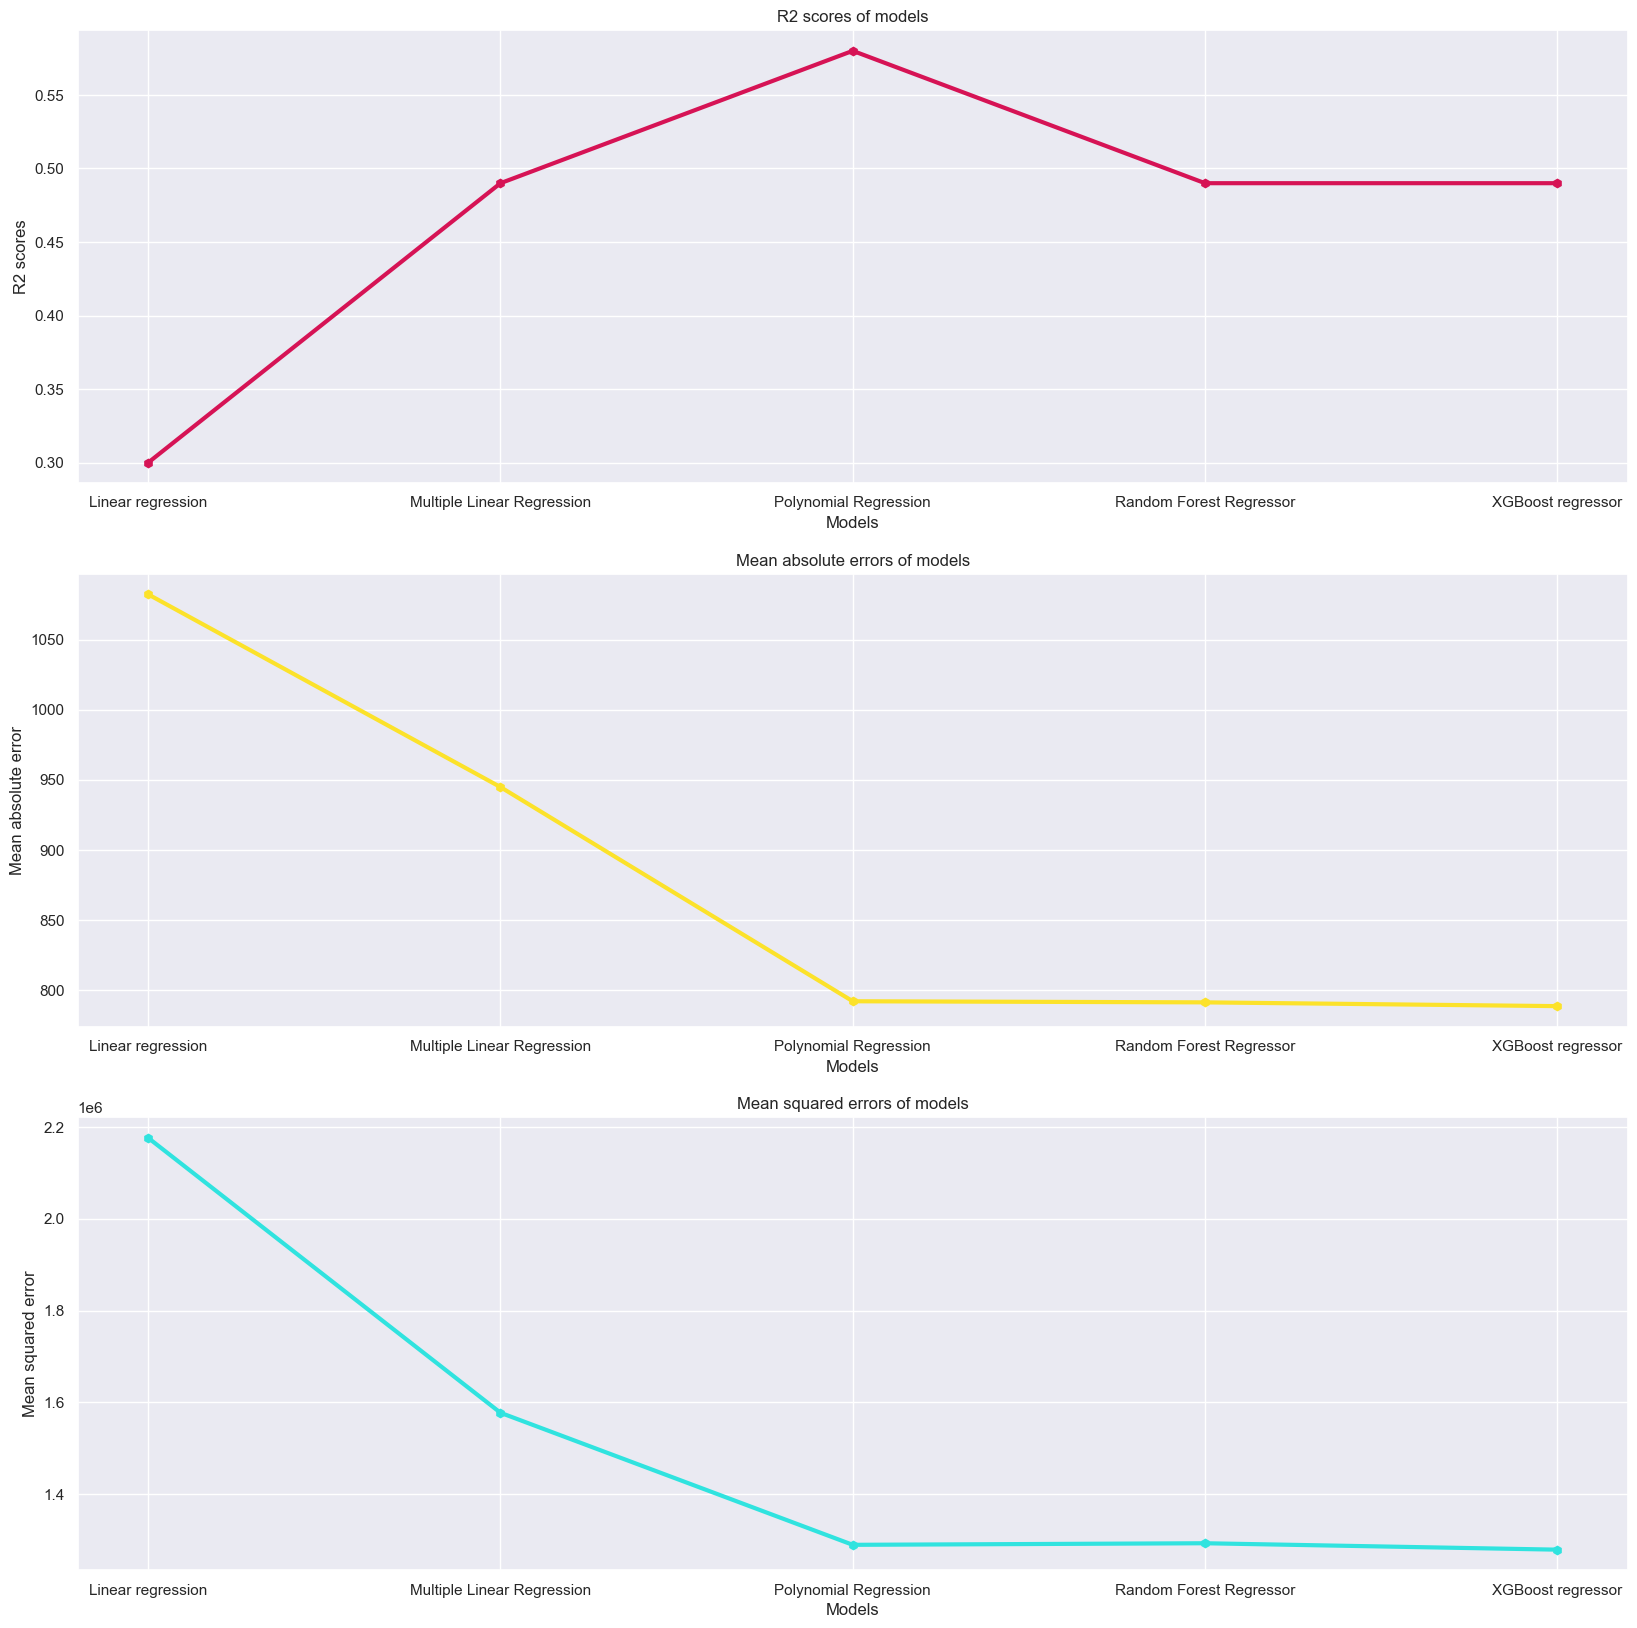

In [90]:
fig, [ax0,ax1,ax2]=plt.subplots(figsize=(20,20),nrows=3, ncols=1)

ax0.plot(df_error.columns, df_error.loc['R2 score'], marker='h', color='#D61355', linewidth=3)
ax0.set_title('R2 scores of models')
ax0.set_xlabel('Models')
ax0.set_ylabel('R2 scores')

ax1.plot(df_error.columns, df_error.loc['MAE'], marker='h', color='#FCE22A', linewidth=3)
ax1.set_title('Mean absolute errors of models')
ax1.set_xlabel('Models')
ax1.set_ylabel('Mean absolute error')

ax2.plot(df_error.columns, df_error.loc['MSE'], marker='h', color='#30E3DF', linewidth=3)
ax2.set_title('Mean squared errors of models')
ax2.set_xlabel('Models')
ax2.set_ylabel('Mean squared error')

#### From the above graphs we can infer that polynomial regression gives us the best results in terms of R2 score (0.58), MAE (792.05	) and MSE(1289179.98). So, we will be choosing this model to make predictions.

### -----------------------------------------------------------------------------------------------------------------------------
###  *Conclusion:*

In conclusion, the Big Market Sales Prediction project involved analyzing a dataset from Kaggle and developing machine learning models to predict sales in the retail industry. Five different models were tested, including linear regression, multiple regression, polynomial regression, random forest regressor, XGBoost regressor. The evaluation of the models was based on the R2 score, Mean Absolute Error (MAE), and Mean Squared Error (MSE).

After testing the models, it was found that the polynomial regressor with degree 3 performed the best in predicting sales. This model had the highest R2 score and the lowest MAE and MSE. It can be concluded that this model is the most accurate in predicting future sales in the retail industry.

### *Applications:*

The findings of this project can be valuable for companies in the retail industry looking to forecast sales and optimize their business strategies. By utilizing machine learning models such as the polynomial regressor with degree 3, companies can gain insights into consumer behavior and make informed decisions to improve their bottom line. Overall, this project demonstrates the potential of machine learning in predicting sales and its impact on the retail industry.






### -----------------------------------------------------------------------------------------------------------------------------
###  *Credits:*

*Reva Bharara*

*Email : revabharara@gmail.com*

*Linkedin : https://www.linkedin.com/in/reva-bharara-a83a78241/*